In [1]:
from notebooks_tools import *
%matplotlib inline

/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Welcome to ROOTaaS 6.06/02

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# get Single-particle MC for reconstruction efficiency 

In [18]:
# MC_gen_protons = pd.read_csv('/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/g4_features_p_0.02-1.5GeV_isotropic_AnalysisTrees.csv')
# MC_gen_protons = MC_gen_protons[(MC_gen_protons.pdg==2212) & (MC_gen_protons.primary==1)]
# MC_gen_protons['KE'] = MC_gen_protons.Eng - 0.9383
# MC_rec_protons = pd.read_csv('/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/full_features_p_0.02-1.5GeV_isotropic_AnalysisTrees.csv')
# MC_rec_protons = MC_rec_protons[(MC_rec_protons.MCpdgCode==2212)  & (MC_rec_protons.process_primary==1)]
# MC_rec_protons['truth_KE'] = MC_rec_protons.truth_Eng - 0.9383
MCBNB_gen = pd.read_csv('/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/g4_features_MC_BNB_AnalysisTrees.csv')
MCBNB_gen_protons = MCBNB_gen[(MCBNB_gen.pdg==2212) & (MCBNB_gen.primary==1)]
MCBNB_rec = pd.read_csv('/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/full_features_MC_BNB_AnalysisTrees.csv')
MCBNB_rec_protons = MCBNB_rec[(MCBNB_rec.MCpdgCode==2212)  & (MCBNB_rec.process_primary==1)]

In [2]:
mcbnb_testsample = pd.read_csv('/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/PassedGBDTFiles/multi_BNB_TrainedOn_MCBNB_MCCOSMIC/passedGBDT_testsample_87789_tracks_MC_BNB_multi_BNB_TrainedOn_MCBNB_MCCOSMIC_allscores_features_and_scores.csv')

In [3]:
mcbnb_reconstructed_protons = mcbnb_testsample[mcbnb_testsample.MCpdgCode==2212]
print len(mcbnb_reconstructed_protons),'reconstructed protons'
mcbnb_classified_protons = mcbnb_testsample[mcbnb_testsample.mscore_max==0]
print len(mcbnb_classified_protons),'classified protons'
mcbnb_classified_protons_09 = mcbnb_classified_protons[mcbnb_classified_protons.mscore_p>=0.9]
print len(mcbnb_classified_protons_09),'classified protons with score >= 0.9'

42634 reconstructed protons
41742 classified protons
31981 classified protons with score >= 0.9


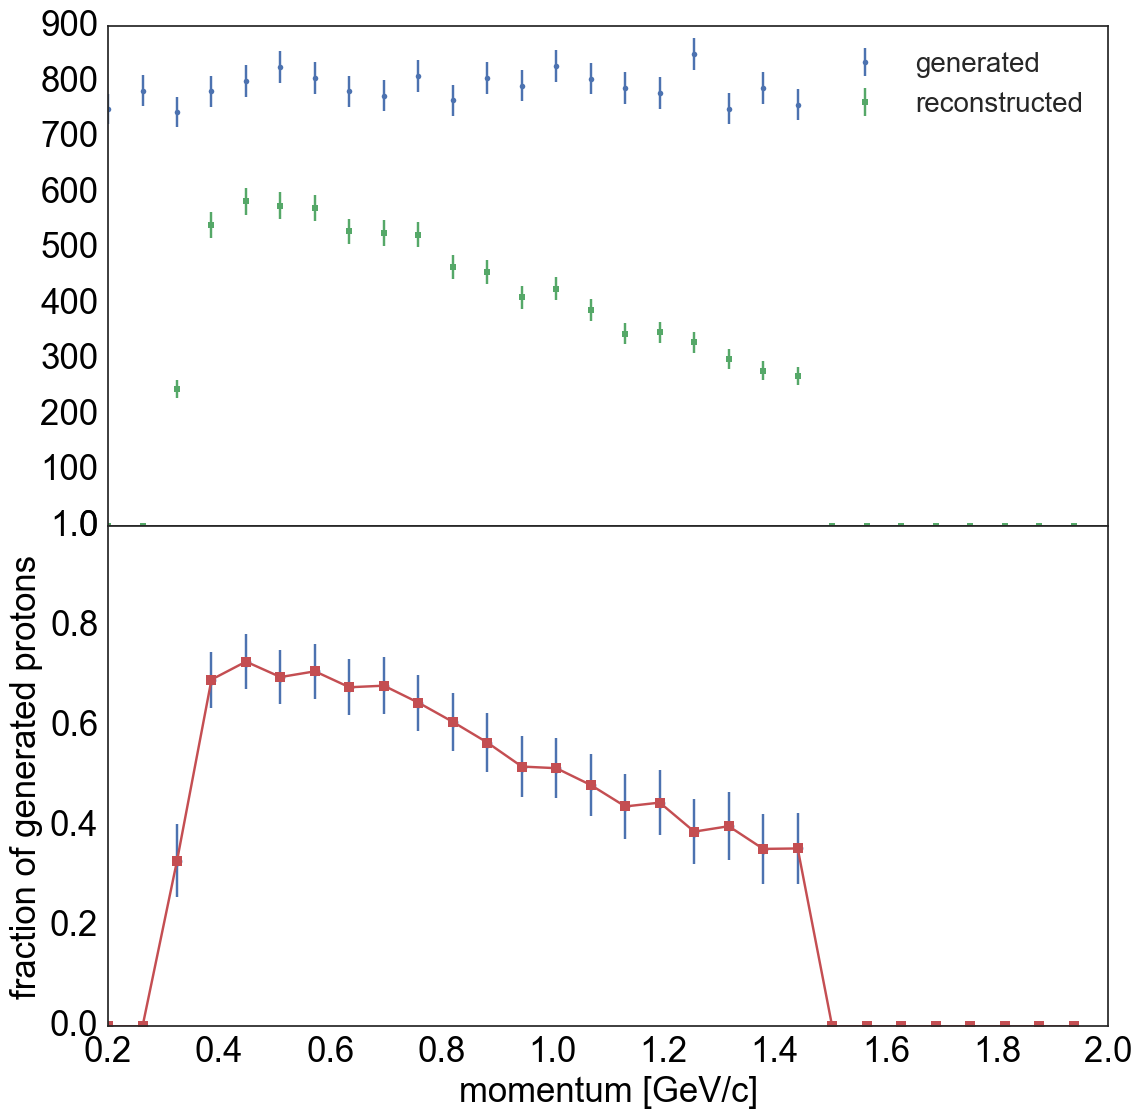

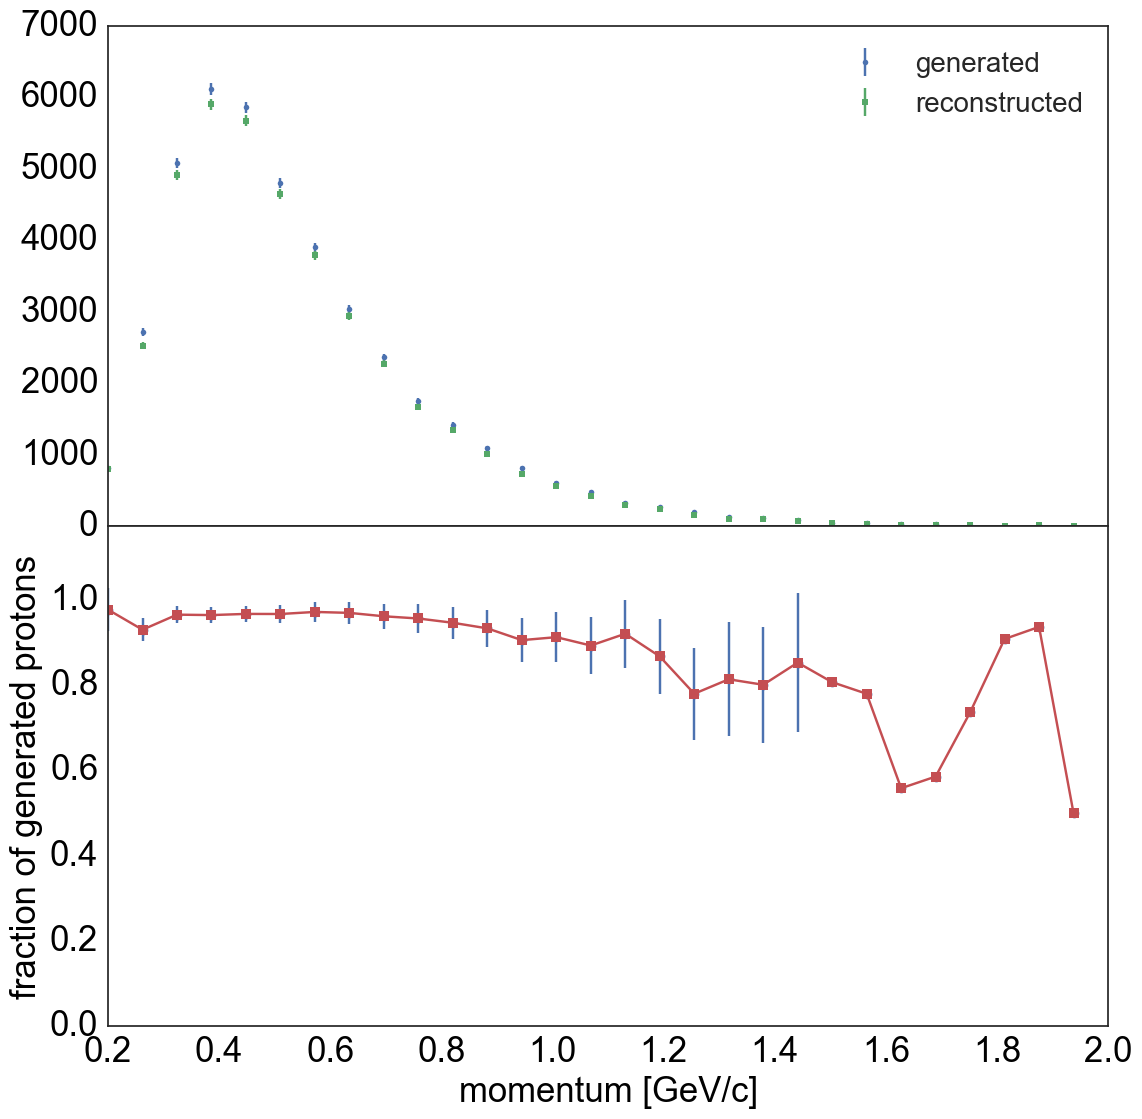

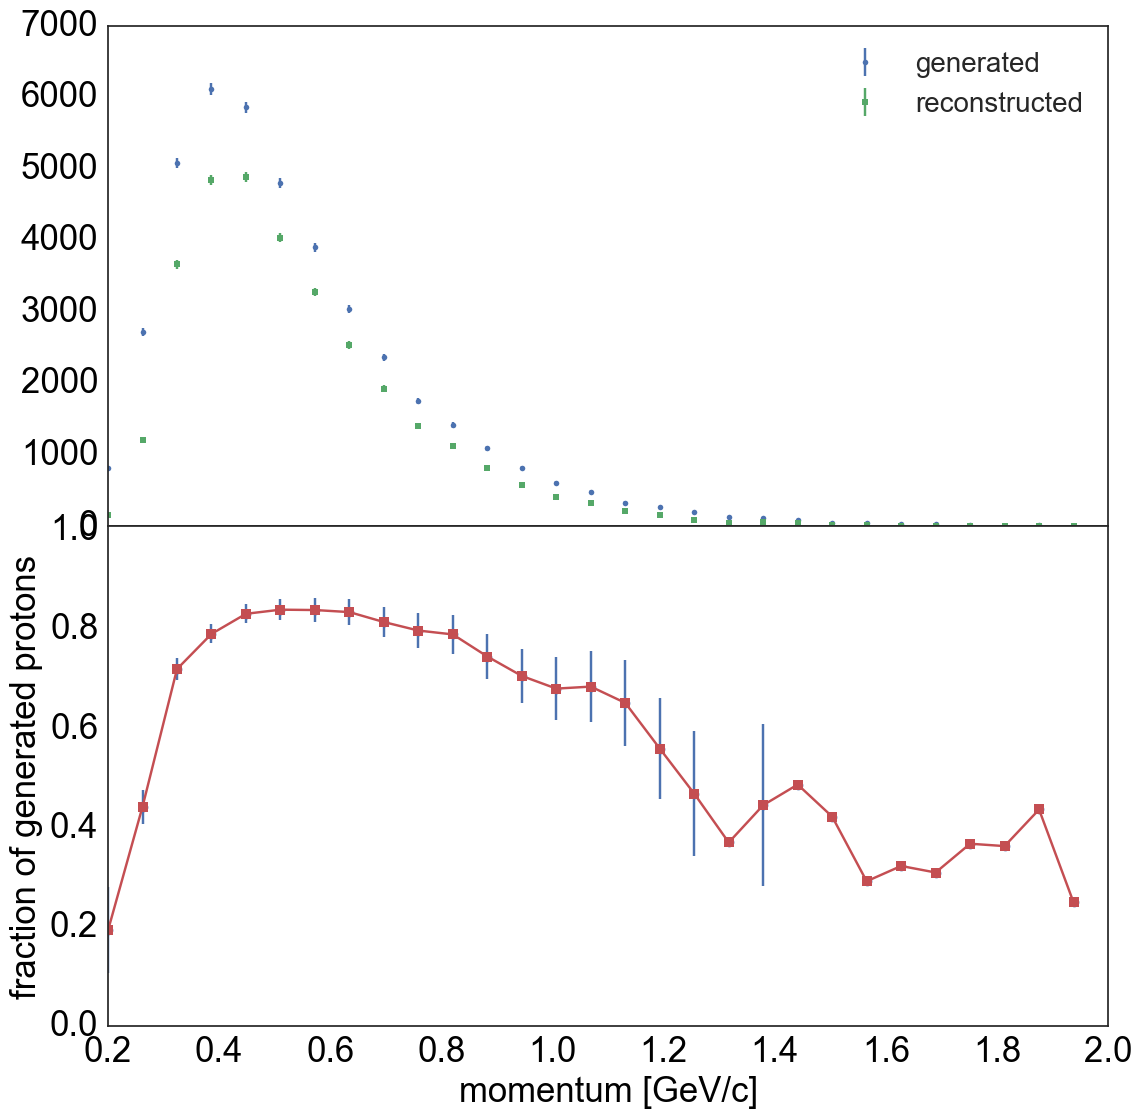

In [15]:
bins=np.linspace(0.2,2,30)
ax , x , reco_eff ,reco_eff_err = efficiency_1d(gen_protons=MC_gen_protons.P, 
                                                rec_protons=MC_rec_protons.truth_P,                                                                 
                                                x_label='momentum [GeV/c]',bins=bins)
ax , x , class_eff , class_eff_err = efficiency_1d(mcbnb_reconstructed_protons.truth_P,  rec_protons=mcbnb_classified_protons.truth_P,                              
                                    x_label='momentum [GeV/c]',bins=bins)
ax , x , class_eff_09 ,class_eff_err_09 = efficiency_1d(mcbnb_reconstructed_protons.truth_P,  rec_protons=mcbnb_classified_protons_09.truth_P,                              
                                    x_label='momentum [GeV/c]',bins=bins)
# print 'x:\n',x
# print 'classification eff.:\n',classification_eff
# print 'classification eff. for high score:\n',classification_eff_09

In [23]:
recoclass_eff,recoclass_eff_err=[],[]
recoclass_eff_09,recoclass_eff_err_09=[],[]

for i in range(len(reco_eff)):
    recoclass_eff.append( reco_eff[i]*class_eff[i] )
    if reco_eff[i] and class_eff[i]:
        recoclass_eff_err.append( recoclass_eff[i]*np.sqrt(np.square(reco_eff_err[i]/reco_eff[i]) + np.square(class_eff_err[i]/class_eff[i])) )
    elif reco_eff[i]:
        recoclass_eff_err.append( recoclass_eff[i]*reco_eff_err[i]/reco_eff[i] )  
    elif class_eff[i]:
        recoclass_eff_err.append( recoclass_eff[i]*class_eff_err[i]/class_eff[i] )  
    else:
        recoclass_eff_err.append(0)

    recoclass_eff_09.append( reco_eff[i]*class_eff_09[i] )
    if reco_eff[i] and class_eff_09[i]:
        recoclass_eff_err_09.append( recoclass_eff_09[i]*np.sqrt(np.square(reco_eff_err[i]/reco_eff[i]) + np.square(class_eff_err_09[i]/class_eff_09[i])) )
    elif reco_eff[i]:
        recoclass_eff_err_09.append( recoclass_eff_09[i]*reco_eff_err[i]/reco_eff[i] )  
    elif class_eff[i]:
        recoclass_eff_err_09.append( recoclass_eff_09[i]*class_eff_err_09[i]/class_eff_09[i] )  
    else:
        recoclass_eff_err_09.append(0)

        

(0.2, 1.5)

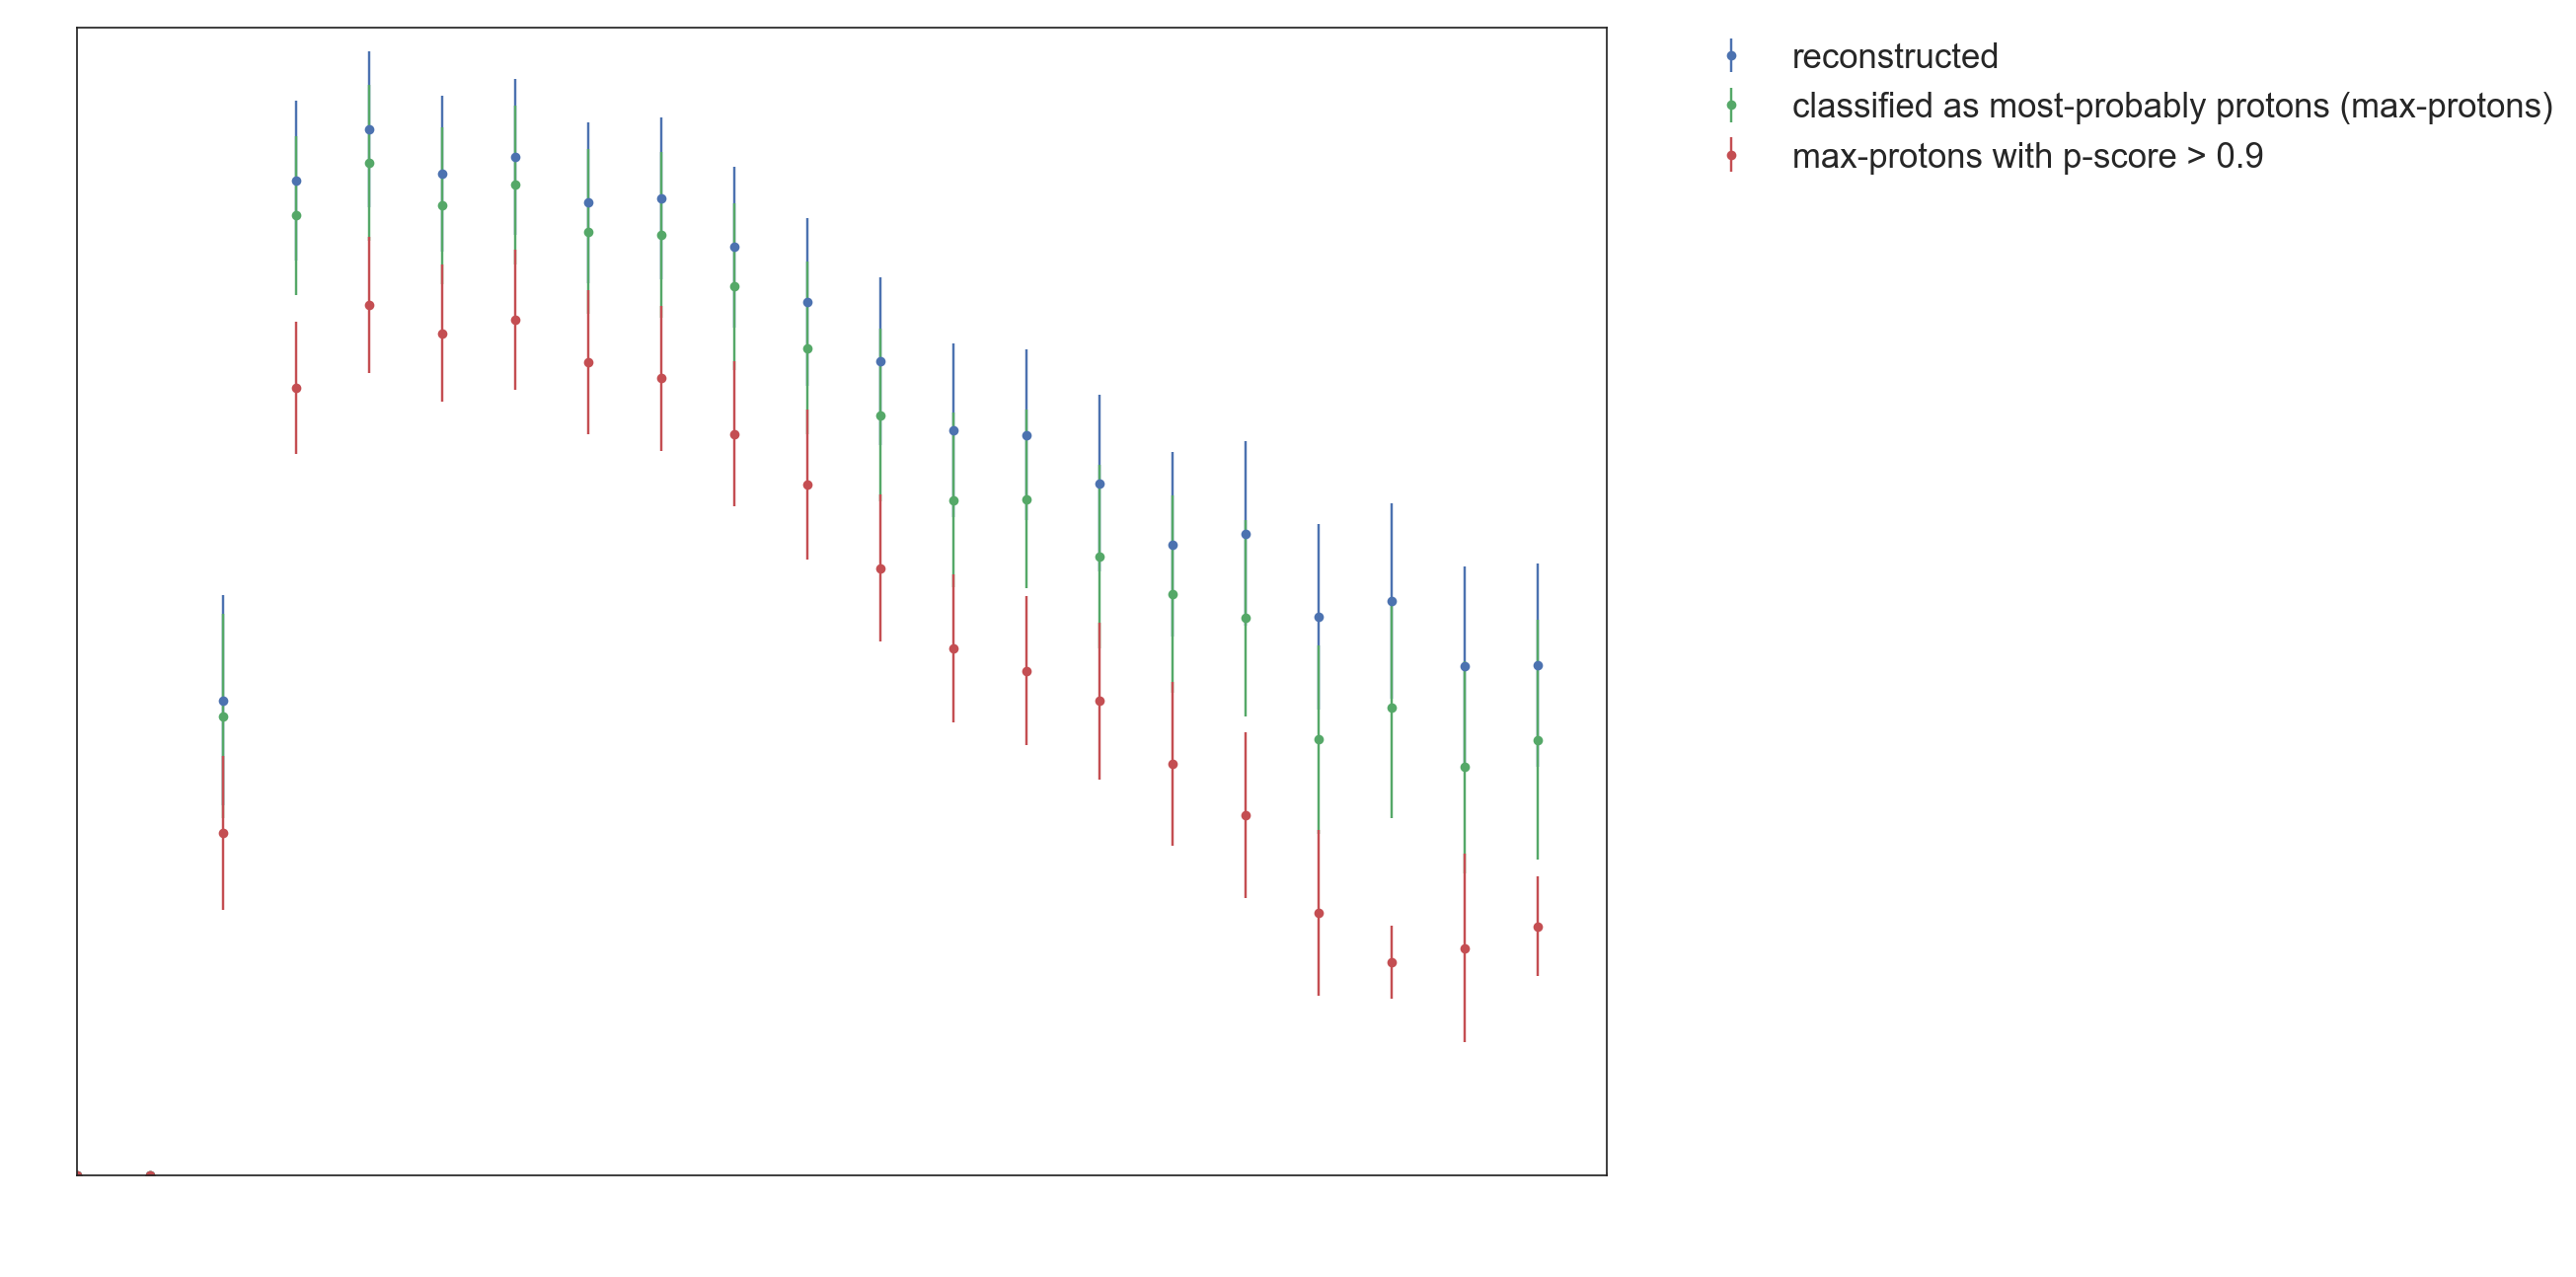


tab completion not implemented for this context


In [36]:
fig,ax=plt.subplots(figsize=(20,15))
ax.errorbar(x , reco_eff , yerr=reco_eff_err , label='reconstructed' , fmt='o')
ax.errorbar(x , recoclass_eff , yerr=recoclass_eff_err , label='classified as most-probably protons (max-protons)' , fmt='o')
ax.errorbar(x , recoclass_eff_09 , yerr=recoclass_eff_err_09 , label=r'max-protons with p-score > 0.9' , fmt='o')
set_axes(ax,x_label='momentum [GeV/c]',ticks_color='white',fontsize=30)
ax.legend(fontsize=25,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlim(0.2,1.5)